Train dataset length: 54000
Validation dataset length: 6000
Test dataset length: 10000
Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9097 - loss: 0.3048 - val_accuracy: 0.9815 - val_loss: 0.0604
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9877 - loss: 0.0421 - val_accuracy: 0.9888 - val_loss: 0.0394
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9895 - val_loss: 0.0367
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9957 - loss: 0.0143 - val_accuracy: 0.9882 - val_loss: 0.0504
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9882 - val_loss: 0.0453
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 0.9903 - val_loss: 0.0425
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9907 - val_loss: 0.0

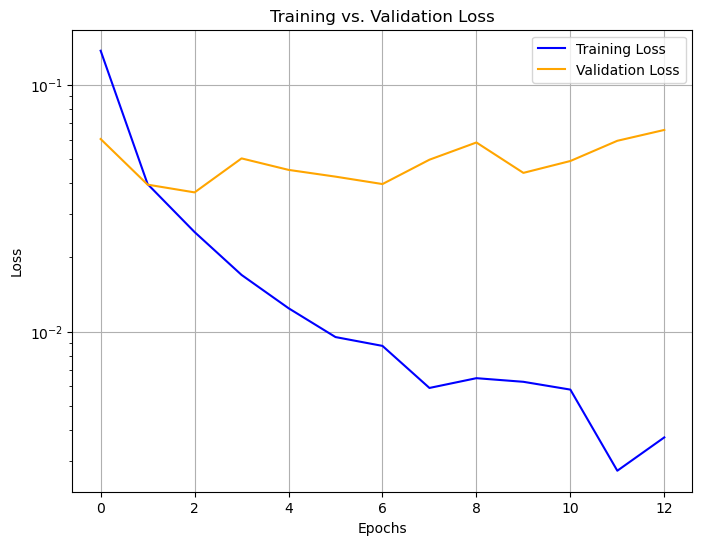

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


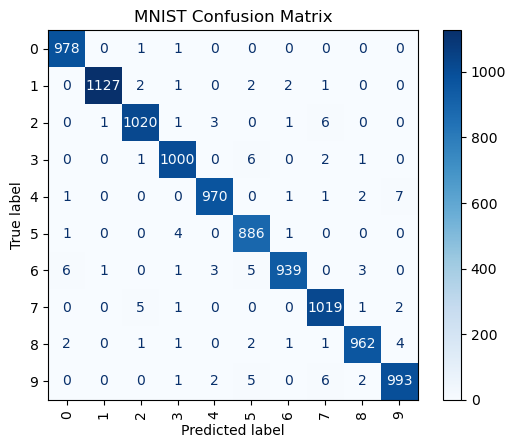

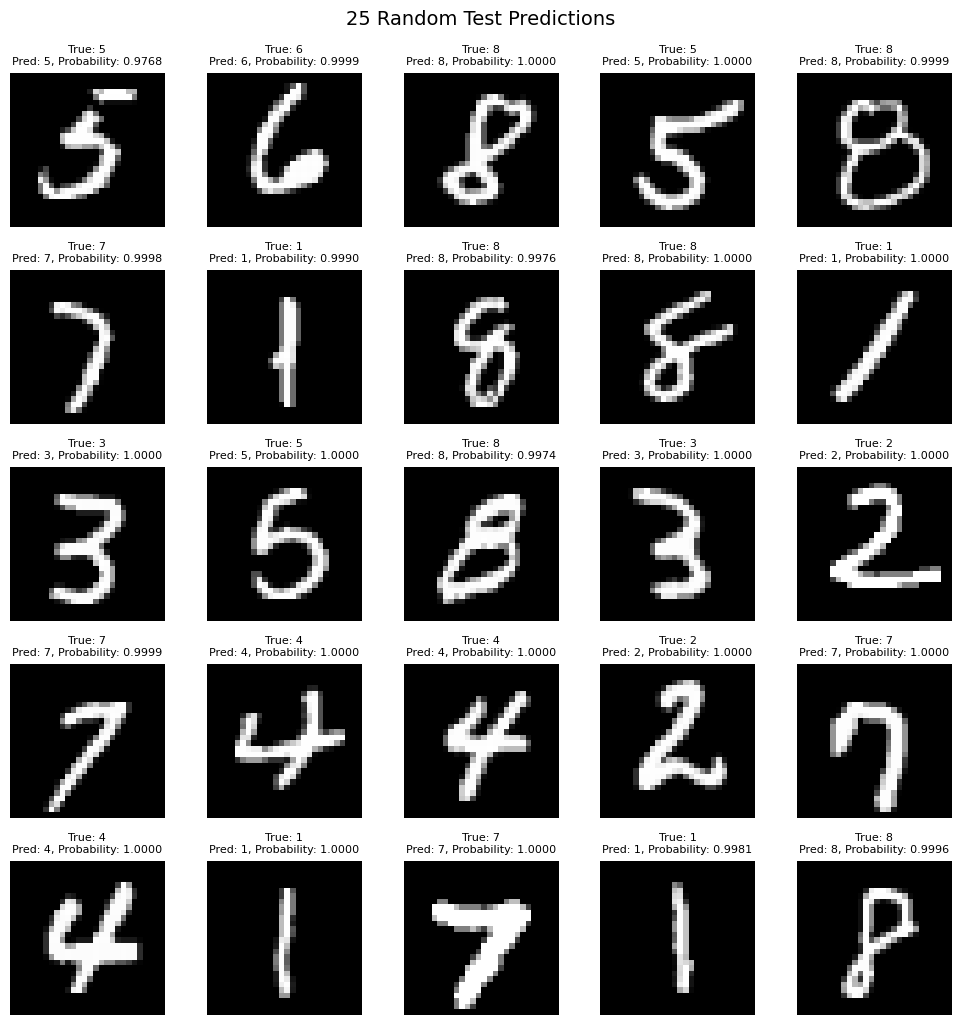

In [2]:
"""
Convolutional Neural Network (CNN) for MNIST Digit Classification

This script loads the MNIST dataset of handwritten digits, preprocesses it,
builds a CNN model using Keras, and trains the model with early stopping.
It also evaluates the model on a test set, visualizes training/validation loss,
and displays a confusion matrix for performance analysis.
"""

# === Imports ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import random

# === Optional: Reproducibility ===
# import random
# seed = 42
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# tf.config.experimental.enable_op_determinism()
# tf.keras.backend.clear_session()

# === Load and preprocess MNIST data ===
(X_train_full, Y_train_full), (X_test, Y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to add channel dimension (grayscale → 1 channel)
X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode class labels
Y_train_full = to_categorical(Y_train_full, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Split off a validation set from training data
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train_full, Y_train_full, test_size=0.1, random_state=42
)

print("Train dataset length:", len(X_train))
print("Validation dataset length:", len(X_val))
print("Test dataset length:", len(X_test))

# === Build the CNN model ===
model = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer: 28x28 grayscale image

    Conv2D(32, kernel_size=(3, 3), activation='relu'),  # First convolutional layer: 32 filters, 3x3 size, detects low-level features (edges, corners)

    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second convolutional layer: 64 filters, learns more complex features (e.g., shapes)

    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer: reduces spatial size (downsampling), adds translation invariance

    Flatten(),  # Flatten layer: flattens 3D feature maps into a 1D vector for dense layers

    Dense(128, activation='relu'),  # Fully connected (dense) layer: 128 neurons to combine features into high-level patterns

    Dense(10, activation='softmax')  # Output layer: 10 neurons (one per digit class), softmax outputs probability distribution
])

# Compile the model with Adam optimizer and cross-entropy loss
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping: stop training if validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# === Train the model ===
history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, Y_val),
    verbose=1,
    callbacks=[early_stop],
)

# === Evaluate on test set ===
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# === Plot training and validation loss ===
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training vs. Validation Loss")
plt.yscale('log')  # Log scale helps visualize convergence
plt.legend()
plt.grid(True)
plt.show()

# === Confusion matrix ===
# Predict digit classes on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("MNIST Confusion Matrix")
plt.grid(False)
plt.show()

# === Show 25 random predictions with actual, predicted labels and confidence ===
indices = random.sample(range(len(X_test)), 25)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    image = X_test[idx].reshape(28, 28)
    true_label = y_true[idx]
    pred_label = y_pred[idx]
    confidence = y_pred_probs[idx][pred_label]

    plt.subplot(5, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}, Probability: {confidence:.4f}", fontsize=8)

plt.tight_layout()
plt.suptitle("25 Random Test Predictions", fontsize=14, y=1.02)
plt.show()

Train dataset length: 54000
Validation dataset length: 6000
Test dataset length: 10000
Epoch 1/100


2025-03-27 10:41:19.354254: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-27 10:41:19.354581: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9068 - loss: 0.3094

2025-03-27 10:41:38.949440: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-27 10:41:38.949723: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9070 - loss: 0.3088 - val_accuracy: 0.9768 - val_loss: 0.0794
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9855 - loss: 0.0462 - val_accuracy: 0.9842 - val_loss: 0.0515
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9882 - val_loss: 0.0425
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9848 - val_loss: 0.0547
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9887 - val_loss: 0.0429
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9903 - val_loss: 0.0411
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9902 - val_loss: 0.0443
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9977 - loss: 0.0068 - val_

2025-03-27 10:46:12.465058: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-27 10:46:12.465304: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),


Test accuracy: 0.9894


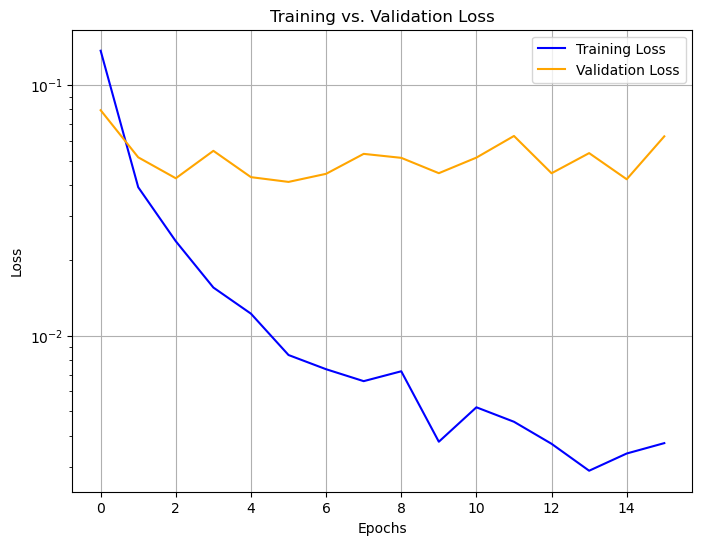

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


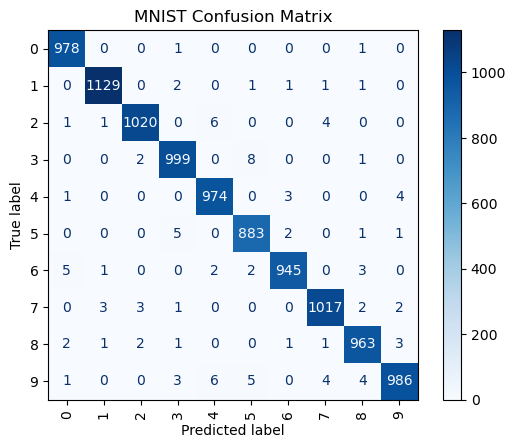

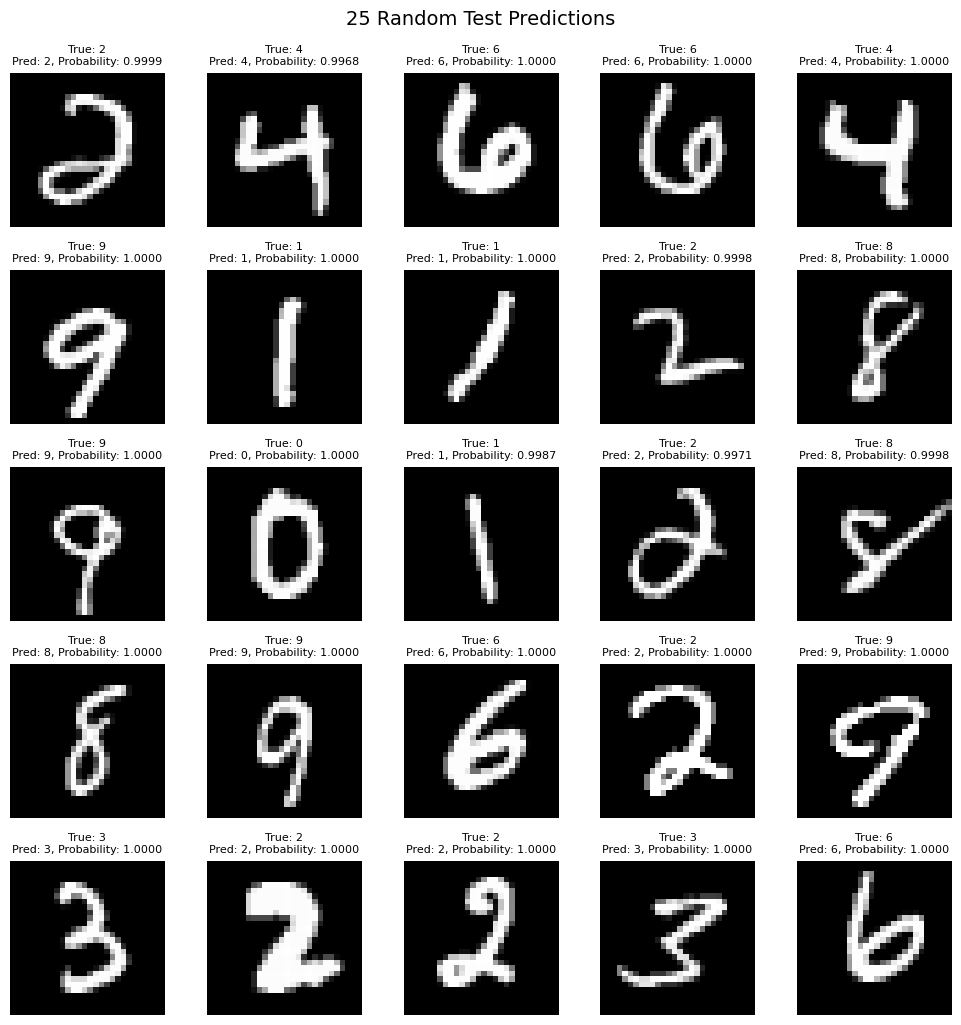

In [3]:
# === Optional: Reproducibility ===
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()
tf.keras.backend.clear_session()

# === Load and preprocess MNIST data ===
(X_train_full, Y_train_full), (X_test, Y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to add channel dimension (grayscale → 1 channel)
X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode class labels
Y_train_full = to_categorical(Y_train_full, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Split off a validation set from training data
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train_full, Y_train_full, test_size=0.1, random_state=42
)

print("Train dataset length:", len(X_train))
print("Validation dataset length:", len(X_val))
print("Test dataset length:", len(X_test))

# === Build the CNN model ===
model = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer: 28x28 grayscale image

    Conv2D(32, kernel_size=(3, 3), activation='relu'),  # First convolutional layer: 32 filters, 3x3 size, detects low-level features (edges, corners)

    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second convolutional layer: 64 filters, learns more complex features (e.g., shapes)

    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer: reduces spatial size (downsampling), adds translation invariance

    Flatten(),  # Flatten layer: flattens 3D feature maps into a 1D vector for dense layers

    Dense(128, activation='relu'),  # Fully connected (dense) layer: 128 neurons to combine features into high-level patterns

    Dense(10, activation='softmax')  # Output layer: 10 neurons (one per digit class), softmax outputs probability distribution
])

# Compile the model with Adam optimizer and cross-entropy loss
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping: stop training if validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# === Train the model ===
history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, Y_val),
    verbose=1,
    callbacks=[early_stop],
)

# === Evaluate on test set ===
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# === Plot training and validation loss ===
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training vs. Validation Loss")
plt.yscale('log')  # Log scale helps visualize convergence
plt.legend()
plt.grid(True)
plt.show()

# === Confusion matrix ===
# Predict digit classes on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("MNIST Confusion Matrix")
plt.grid(False)
plt.show()

# === Show 25 random predictions with actual, predicted labels and confidence ===
indices = random.sample(range(len(X_test)), 25)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    image = X_test[idx].reshape(28, 28)
    true_label = y_true[idx]
    pred_label = y_pred[idx]
    confidence = y_pred_probs[idx][pred_label]

    plt.subplot(5, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}, Probability: {confidence:.4f}", fontsize=8)

plt.tight_layout()
plt.suptitle("25 Random Test Predictions", fontsize=14, y=1.02)
plt.show()

In [4]:
import sys
import keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print (f"Python Platform: {platform.platform ()}")
print (f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print ()

print (f"Python {sys.version}")
print (f"Pandas {pd.__version__}")
print (f"Scikit-Learn {sk.__version__}")
print (f"SciPy {sp.__version__}")
gpu = len (tf.config.list_physical_devices ('GPU'))>0
print ("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.6.1-arm64-arm-64bit
Tensor Flow Version: 2.19.0
Keras Version: 3.9.0

Python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
Pandas 2.2.2
Scikit-Learn 1.5.1
SciPy 1.13.1
GPU is NOT AVAILABLE
